<a href="https://colab.research.google.com/github/AlishaZaheer1/DEN_INTERNSHIP/blob/main/Copy_of_den_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 56ms/step - accuracy: 0.2451 - loss: 2.0059 - val_accuracy: 0.4531 - val_loss: 1.4817
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 0.4222 - loss: 1.5840 - val_accuracy: 0.5197 - val_loss: 1.3024
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 55ms/step - accuracy: 0.4741 - loss: 1.4662 - val_accuracy: 0.5548 - val_loss: 1.2286
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 57ms/step - accuracy: 0.5065 - loss: 1.3910 - val_accuracy: 0.5683 - val_loss: 1.2043
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - accuracy: 0.5254 - loss: 1.3424 - val_accuracy: 0.5604 - val_loss: 1.2212
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 55ms/step - accuracy: 0.5380 - loss: 1.3099 - val_accuracy: 0.5773 - val_loss: 1.1883
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 57ms/step - accuracy: 0.5502 - loss: 1.2760 - val_accuracy: 0.5800 - val_loss: 1.1707
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 58ms/step - accuracy: 0

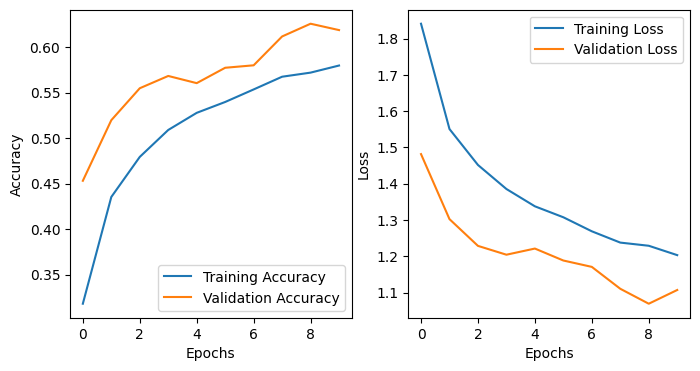

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
# The dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Data augmentation (optional)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Build a CNN model
model = models.Sequential([
    data_augmentation,  # Add data augmentation to the model

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Dropout for regularization
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # 10 output units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training history (accuracy and loss over epochs)
plt.figure(figsize=(8, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
